<a href="https://colab.research.google.com/github/hannahestauss/Portfolio/blob/main/Happiness_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of the World Happiness Reports from 2015-2022

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the Cantril ladder, which asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.


The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

The column for Dystopia + Residual shows the amount of the score under-explained by the other factors in the Happiness Index. The average residual over the countries is close to 0. If a country has a higher score than 1.83, it means they are happier than the factors show they "should" be. If they have a Dystopia + Residual score less than 1.83, it means they are less happy than predicted by the other factors.



In this report, I've chosen to focus on the following questions:


1. Which regions of the world are the happiest? Is this still shifting?

2. How has global happiness changed over the past few years?

3. What makes the United States happy?

#Data Cleaning and Formatting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.animation as animation
%matplotlib notebook
%matplotlib inline

In [ ]:
H2015 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2015.csv?token=GHSAT0AAAAAAB4CWOERHJEM2DTXTMNYYRXIY4TVXOQ")
H2016 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2016.csv?token=GHSAT0AAAAAAB4CWOERQDDB5PIXU54LZR7GY4TVYEA")
H2017 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2017.csv?token=GHSAT0AAAAAAB4CWOEQHJK4MGVPQNY6LF66Y4TV6FQ")
H2018 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2018.csv?token=GHSAT0AAAAAAB4CWOERUVIUQUEZ2KTTHYG6Y4TV6OQ")
H2019 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2019.csv?token=GHSAT0AAAAAAB4CWOEQEOFAVT2NN6ASHN3GY4TV63A")
H2020 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2020.csv?token=GHSAT0AAAAAAB4CWOER4BOF75CCKZ3DF27GY4TV7FA")
H2021 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2021.csv?token=GHSAT0AAAAAAB4CWOEQSEBKVYJTQ32AAA7SY4TV7QA")
H2022 = pd.read_csv("https://raw.githubusercontent.com/hannahestauss/Happiness-Analysis-Vis/main/2022.csv?token=GHSAT0AAAAAAB4CWOEQFOH567L7NL34XNDMY4TV7YQ")

In [ ]:
Cols = ['Happiness Score', 'Dystopia', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
H2015['Year'] = 2015
H2016['Year'] = 2016
H2017['Year'] = 2017
H2018['Year'] = 2018
H2019['Year'] = 2019
H2020['Year'] = 2020
H2021['Year'] = 2021
H2022['Year'] = 2022
for col in Cols:
  H2022[col] = H2022[col].str.replace(',','.')
H2022['Happiness Score'] = H2022['Happiness Score'].astype(float)
H2022.rename(columns={'Happiness score' : 'Happiness Score'}, inplace=True)
H2022['Region'] = H2021['Region']
H2019['Region'] = H2021['Region']
H2022.drop(146, axis=0, inplace=True)

In [ ]:
frames = [H2015, H2016, H2017, H2018, H2019, H2020, H2021, H2022]
dframes = [H2015, H2016, H2017, H2020, H2021, H2022]
result = pd.concat(frames, join="inner")
dystopia = pd.concat(dframes, join="inner")

In [ ]:
result = result[result.groupby('Country').Country.transform(len) == 8]
result = result.dropna(how='all')

In [ ]:
sns.set(rc={'figure.figsize':(15,4),'axes.facecolor':'#E7D6CC', 'figure.facecolor':'white'})
color=sns.color_palette("Paired")
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

##Exploratory Analysis

I wanted to take a look at the correlations between the factors before I dove in. These visualizations aren't "publish worthy," but they're helpful for me to see trends I could/should explore in the data. The pairplot is an efficient way to view all of them at once in an easy-to-read and easy-to-create way.

In [ ]:
columns = ['Happiness Score', 'GDP', 'Corruption', 'Generosity', 'Freedom', 'Life Expectancy', 'Dystopia']

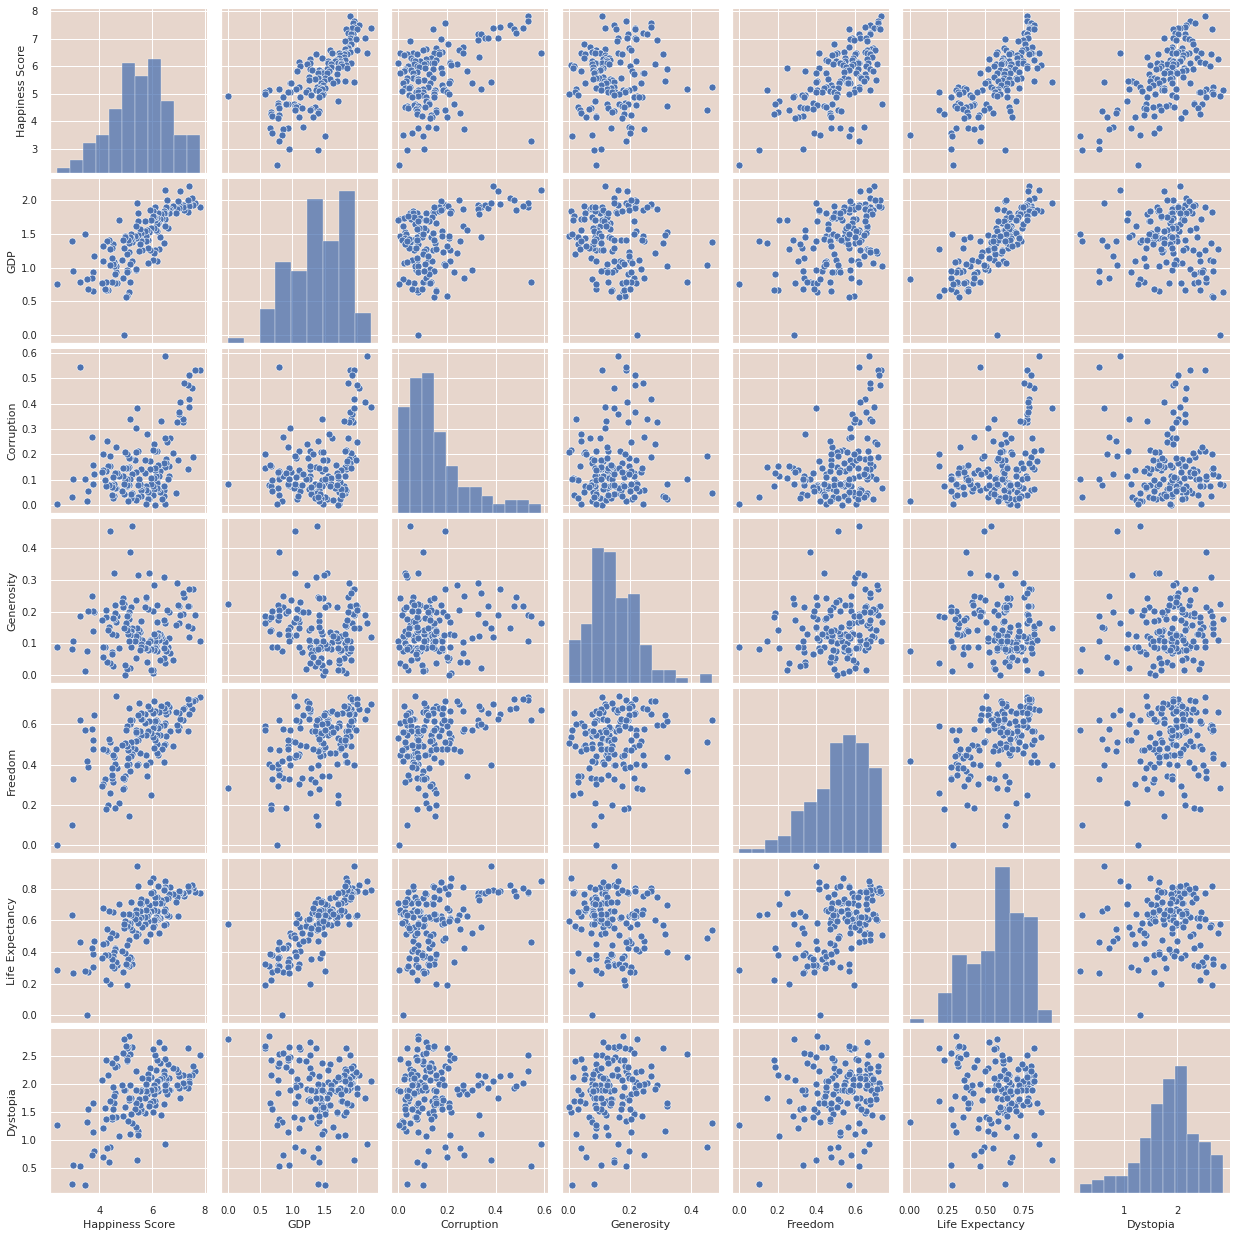

In [ ]:
sns.pairplot(H2022[columns])

From these graphs, the correlations I find most interesting include:

1. The happiness score has the strongest correlation with GDP, Life Expectancy, and freedom to make life choices.
2. As the happiness score goes up, so does the amount of Dystopia. Countries who are less happy are more likely to see things as they are, while happier countries are more likely to consider themselves happier.
3. A vast majority of countries that have high perceptions of corruption are also the happiest countries.
4. At a certain level of GDP, the amount of corruption sharply increases. Very few countries have a high GDP and low levels of corruption.

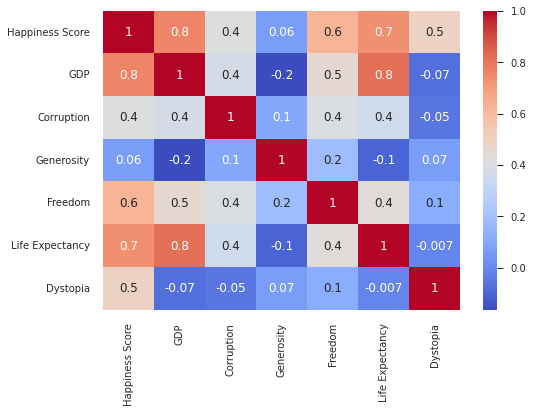

In [ ]:
sns.heatmap(H2022[columns].corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

I found it interesting that corruption  has a high correlation with every other indicator except generosity and dystopia.

When countries are more generous, they tend to be percieved as less corupt.

When countries have a higher corruption, people tend to negatively view their happiness.

#Which regions of the world are the happiest?

I chose to represent the regions' happiness using box/whisker plots in order to show not only the average happiness, but also the range of each region.

[Text(0.5, 1.0, 'Happiness by Region in 2015')]

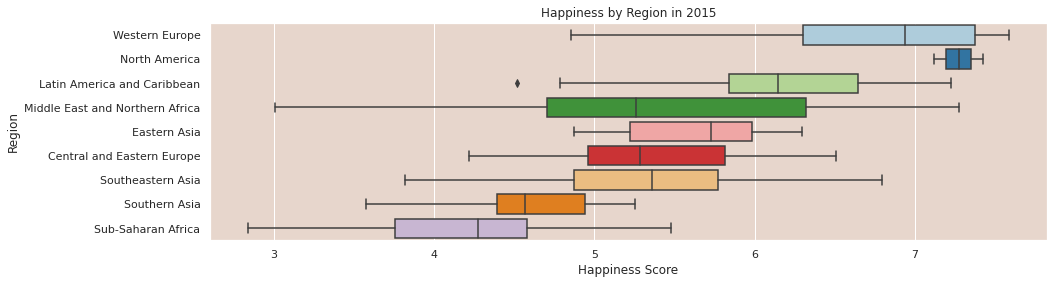

In [ ]:
order1 = ['Western Europe', 'North America', 'Latin America and Caribbean', 'Middle East and Northern Africa','Eastern Asia', 'Central and Eastern Europe', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa']
sns.boxplot(x=H2015['Happiness Score'],y=H2015['Region'], palette=color, orient="h", order = order1).set(title='Happiness by Region in 2015')

[Text(0.5, 1.0, 'Happiness by Region in 2022')]

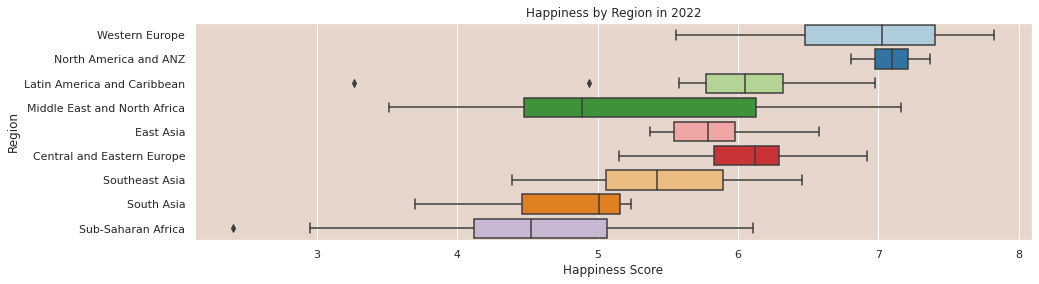

In [ ]:
order = ['Western Europe', 'North America and ANZ', 'Latin America and Caribbean', 'Middle East and North Africa','East Asia', 'Central and Eastern Europe', 'Southeast Asia', 'South Asia', 'Sub-Saharan Africa']
sns.boxplot(x=H2022['Happiness Score'],y=H2022['Region'], palette=color, orient="h", order=order).set(title='Happiness by Region in 2022')

I decided to graph both the statistics from 2015 and 2022 to see the shift in regional happiness across the last seven years. I maintained the same ordering as the first box plot in the second so that the changes would be more visible to the eye, seeing how the descension becomes more staggered and a few regions are out of place. To further visualize the change, rather than just the balance at different moments in time, I chose to use a grouped bar chart that displays the mean Happiness Score by region and year.

In [ ]:
groupresult = result
groupresult.set_index('Country')
groupresult['Region'] = H2022['Region']
groupresult.reset_index(inplace=True)

In [ ]:
df_groups = groupresult.groupby(['Region', 'Year'])['Happiness Score'].mean()

In [ ]:
df = df_groups.to_frame()
df.reset_index(inplace = True)
df.set_index(['Year'], inplace = True)

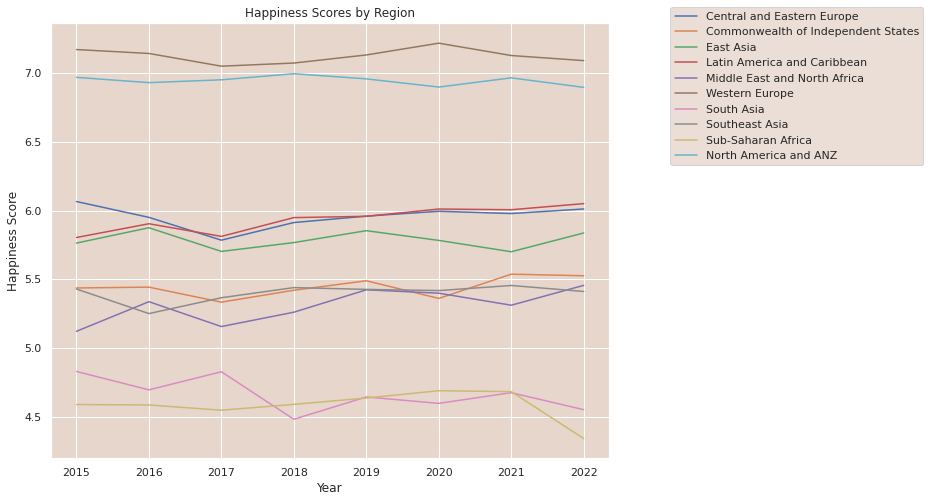

In [ ]:
labels = ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean', 'Middle East and North Africa' ,'Western Europe', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'North America and ANZ']
fig, ax = plt.subplots(figsize=(10,8))
bp = df.groupby('Region').plot(ax=ax)
ax.set_ylabel('Happiness Score')
ax.set_title('Happiness Scores by Region')
ax.legend(labels, bbox_to_anchor=(1.1, 1.05))

#Corruption Correlation

In my data exploration, I noticed an interesting and significant correlation between the absence of corruption and the other factors. I wanted to further explore the correlation between wealth and corruption. I decided to include happiness in the mix, as this project is about exploring the conditions of happiness across the globe.

Perceptions of corruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government in this country or not?” and “Is corruption widespread within businesses in this country or not?”

In [ ]:
Cols = ['Happiness Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
for col in Cols:
    H2022[col] = H2022[col].astype(float)

In [ ]:
fig = px.scatter(H2022, x="GDP", y="Corruption",
                 color='Happiness Score',
           hover_name="Country",
           title = "GDP and The Absence of Corruption",
           size_max = 60)
fig.show()

As countries cross a certain wealth boundary, they tend to be less plagued by corruption. The corruptipn score is sometimes difficult to interpret, as higher scores mean that citizens believe their governemtn is more absent of corruption. It could be better called "Trust in Government" as it used to be called in earlier reports.


The graph also shows the strong correlation between GDP and happiness. GDP impacts life expectancy and social support, so this is not shocking. A richer country has more resources to provide for its people, leading to higher happiness. People have more opportunities and see future possibilities for themselves.

#How has the happiness score changed over the last few years?

In order to tell a story of global happiness, I decided to create an animated choropleth map of happiness scores over the past seven years. You're able to view the years individually, zoom in and focus on different regions, and watch any one country's story. I chose to do this kind of visualization for the flexibility, functionality, and the

In [ ]:
plt.style.use("seaborn-notebook")


fig = px.choropleth(result.sort_values('Year'),
                    color_continuous_scale = 'RdYlGn',
                   locations = 'Country',
                   color = 'Happiness Score',
                   locationmode = 'country names',
                   animation_frame = 'Year')
fig.update_layout(title = "Happiness Scores from 2017 to 2022")
fig.show()

#Happiness in the United States

In [ ]:
US = H2022[H2022['Country'] == 'United States']
categories = ['Dystopia', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
US = US.T

In [ ]:
US.drop(US.index[[0,1,2,3,4,12,13]], inplace= True)

In [ ]:
US.columns =['Score']

[Text(0.5, 1.0, 'United States Happiness Score')]

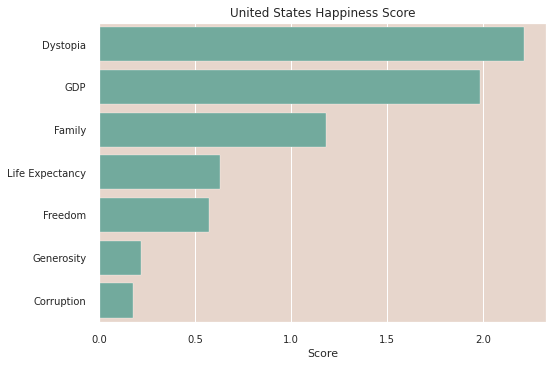

In [ ]:
sns.barplot(
    x="Score",
    y=US.index,
    data=US,
    estimator=sum,
    ci=None,
    color='#69b3a2').set(title='United States Happiness Score')

This plot shows that the United States' happiness score is made up mostly of dystopia, GDP, and family. The dystopia score is higher than average, accounting for half a point.

This indicates that the perceptions of happiness can't be explained by the conditions in the United States, when compared to other countries.

I was surprised to learn that the United States didn't score well for life expectancy, but learned that we rank 54th in the world.

These numbers make it clear that the United States' GDP is the biggest reason for the high happiness score, making all of the other values look small. In comparison to other countries, the scores for other categories are higher than average. However, The United States' GDP is far, far higher than average.

Our trust in governent (Corruption) score is very low compared to other countries in the top ranks.